In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.compose import ColumnTransformer

from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

In [202]:
df_test = pd.read_csv("samsung_HAR/samsung_test.txt", header = None, sep=r"\s+")

In [203]:
df_test_target = pd.read_csv("samsung_HAR/samsung_test_labels.txt", header = None, sep=r"\s+")

In [204]:
df_train = pd.read_csv("samsung_HAR/samsung_train.txt", header = None, sep=r"\s+")

In [205]:
df_train_target = pd.read_csv("samsung_HAR/samsung_train_labels.txt", header = None, sep=r"\s+")

In [206]:
df_features = pd.read_csv("samsung_HAR/features.txt", header = None, sep=r"\s+")

In [207]:
df_features = df_features.drop(0, axis=1)

In [208]:
df_features = df_features.transpose()

In [209]:
X = pd.concat([df_train, df_test], axis=0)

In [210]:
X.columns = df_features.values.tolist()

In [211]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [212]:
y = pd.concat([df_train_target, df_test_target], axis=0)

<AxesSubplot:xlabel='None'>

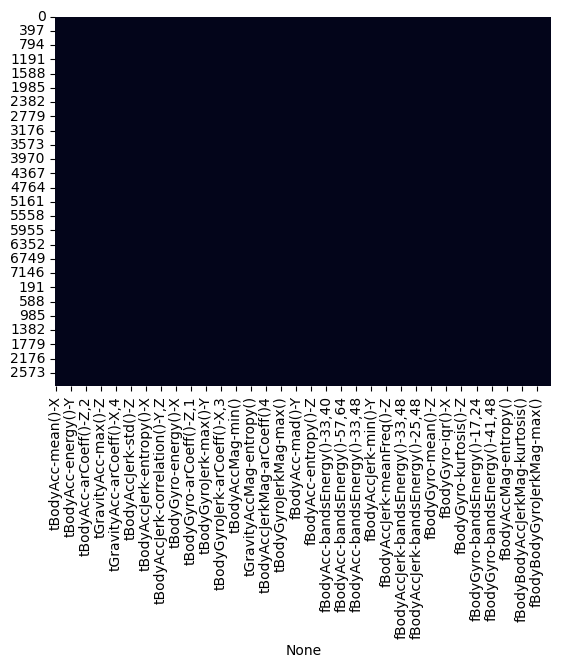

In [213]:
sns.heatmap(X.isnull(), cbar=False)

# Czy potrzeba wszystkich cech? <font color ="green">Najprawdopodobniej nie</font>
# Czy potrzebna jest jakaś obróbka? <font color ="green">Nie dla KMeans, ale w zależności od algorytmu uczenia może być potrzebna standaryzacja</font>
# Czy wiemy, jak obrobić? <font color ="green">Standaryzacja dla LogicRegression</font>
# Czy wiemy, co jaka cecha znaczy? <font color ="green">Trochę tak i trochę nie</font>
# Czy potrzebujemy aż dwóch plików? <font color ="green">Chyba tak</font>
# Pamiętajmy, że mamy do czynienia z Unsupervised Learning. Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego? <font color ="green">Nie dla KMeans ale już przy Supervised Learning tak. W związku z tym podzeliłbym zbiór przed KMeans by nie doszło do wycieku danych.</font>

In [214]:
main_features=[
    'tGravityAcc-mean()-X', 
    'tGravityAcc-mean()-Y', 
    'tGravityAcc-mean()-Z',
    
    'tGravityAcc-std()-X',
    'tGravityAcc-std()-Y',
    'tGravityAcc-std()-Z',
    
    'tBodyAcc-mean()-X',
    'tBodyAcc-mean()-Y',
    'tBodyAcc-mean()-Z',

    'tBodyAcc-std()-X',
    'tBodyAcc-std()-Y',
    'tBodyAcc-std()-Z',
               
    'tBodyAccJerk-mean()-X',
    'tBodyAccJerk-mean()-Y',
    'tBodyAccJerk-mean()-Z',
    
    'tBodyAccJerk-std()-X',
    'tBodyAccJerk-std()-Y',
    'tBodyAccJerk-std()-Z',
                   
    'tBodyGyro-mean()-X', 
    'tBodyGyro-mean()-Y', 
    'tBodyGyro-mean()-Z',

    'tBodyGyro-std()-X', 
    'tBodyGyro-std()-Y', 
    'tBodyGyro-std()-Z',
    
    'tBodyGyroJerk-mean()-X',
    'tBodyGyroJerk-mean()-Y',
    'tBodyGyroJerk-mean()-Z',
    
    'tBodyGyroJerk-std()-X',
    'tBodyGyroJerk-std()-Y',
    'tBodyGyroJerk-std()-Z',
               
    'angle(tBodyAccMean,gravity)',
    'angle(tBodyAccJerkMean),gravityMean)', 
    'angle(tBodyGyroMean,gravityMean)',
               
    'fBodyAcc-meanFreq()-X', 
    'fBodyAcc-meanFreq()-Y', 
    'fBodyAcc-meanFreq()-Z',
               
    'fBodyAcc-skewness()-X', 
    'fBodyAcc-kurtosis()-X', 
    'fBodyAcc-skewness()-Y',
               
    'fBodyAcc-kurtosis()-Y', 
    'fBodyAcc-skewness()-Z', 
    'fBodyAcc-kurtosis()-Z',
               
    'fBodyGyro-entropy()-X', 
    'fBodyGyro-entropy()-Y', 
    'fBodyGyro-entropy()-Z',
    
    'tBodyGyro-correlation()-X,Y',
    'tBodyGyro-correlation()-X,Z',
    'tBodyGyro-correlation()-Y,Z',
    
    'tGravityAccMag-mean()',
    'tGravityAccMag-std()',
    
    'tBodyAccJerkMag-mean()',
    'tBodyAccJerkMag-std()'
]
len(main_features)

52

In [215]:
check = X[main_features][0:52]

In [216]:
check

,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,...,fBodyGyro-entropy()-X,fBodyGyro-entropy()-Y,fBodyGyro-entropy()-Z,"tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tGravityAccMag-mean(),tGravityAccMag-std(),tBodyAccJerkMag-mean(),tBodyAccJerkMag-std()
0,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,0.288585,-0.020294,-0.132905,-0.995279,...,-0.712402,-0.644842,-0.838993,0.709584,0.134873,0.301099,-0.959434,-0.950551,-0.993306,-0.994336
1,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,0.278419,-0.016411,-0.123520,-0.998245,...,-0.611112,-0.764603,-0.751080,0.046721,-0.256929,0.169395,-0.979289,-0.976057,-0.991253,-0.991694
2,0.966878,-0.142010,0.101884,-0.999574,-0.992866,-0.992917,0.279653,-0.019467,-0.113462,-0.995380,...,-0.590987,-0.808287,-0.751080,-0.010130,0.043312,-0.350646,-0.983703,-0.988020,-0.988531,-0.990397
3,0.967615,-0.143976,0.099850,-0.996646,-0.981393,-0.978476,0.279174,-0.026201,-0.123283,-0.996091,...,-0.723666,-0.803754,-0.817286,0.210194,0.141101,-0.725301,-0.986542,-0.986421,-0.993078,-0.993381
4,0.968224,-0.148750,0.094486,-0.998429,-0.988098,-0.978745,0.276629,-0.016570,-0.115362,-0.998139,...,-0.652617,-0.827212,-0.737458,-0.142001,0.484419,-0.724558,-0.992827,-0.991275,-0.993480,-0.995854
5,0.967948,-0.148210,0.091910,-0.998979,-0.986754,-0.997306,0.277199,-0.010098,-0.105137,-0.997335,...,-0.678186,-0.808287,-0.751080,-0.448102,0.645014,-0.745979,-0.994295,-0.995249,-0.993018,-0.995424
6,0.967929,-0.144282,0.093145,-0.999332,-0.988575,-0.992016,0.279454,-0.019641,-0.110022,-0.996921,...,-0.661059,-0.715887,-0.708950,-0.016117,0.466062,-0.687681,-0.987466,-0.982746,-0.991314,-0.989448
7,0.968491,-0.146705,0.091708,-0.998118,-0.972960,-0.976569,0.277432,-0.030488,-0.125360,-0.996559,...,-0.707054,-0.739692,-0.732707,0.204362,0.193001,-0.732650,-0.977458,-0.975997,-0.990851,-0.990388
8,0.968481,-0.154374,0.085118,-0.997789,-0.975645,-0.968961,0.277293,-0.021751,-0.120751,-0.997328,...,-0.707054,-0.827212,-0.730537,-0.187377,0.233717,-0.442481,-0.983631,-0.977514,-0.993325,-0.992887
9,0.968418,-0.156302,0.080874,-0.997362,-0.990502,-0.996742,0.280586,-0.009960,-0.106065,-0.994803,...,-0.635200,-0.685081,-0.646519,-0.365845,0.160245,-0.446921,-0.986772,-0.986702,-0.985388,-0.983643


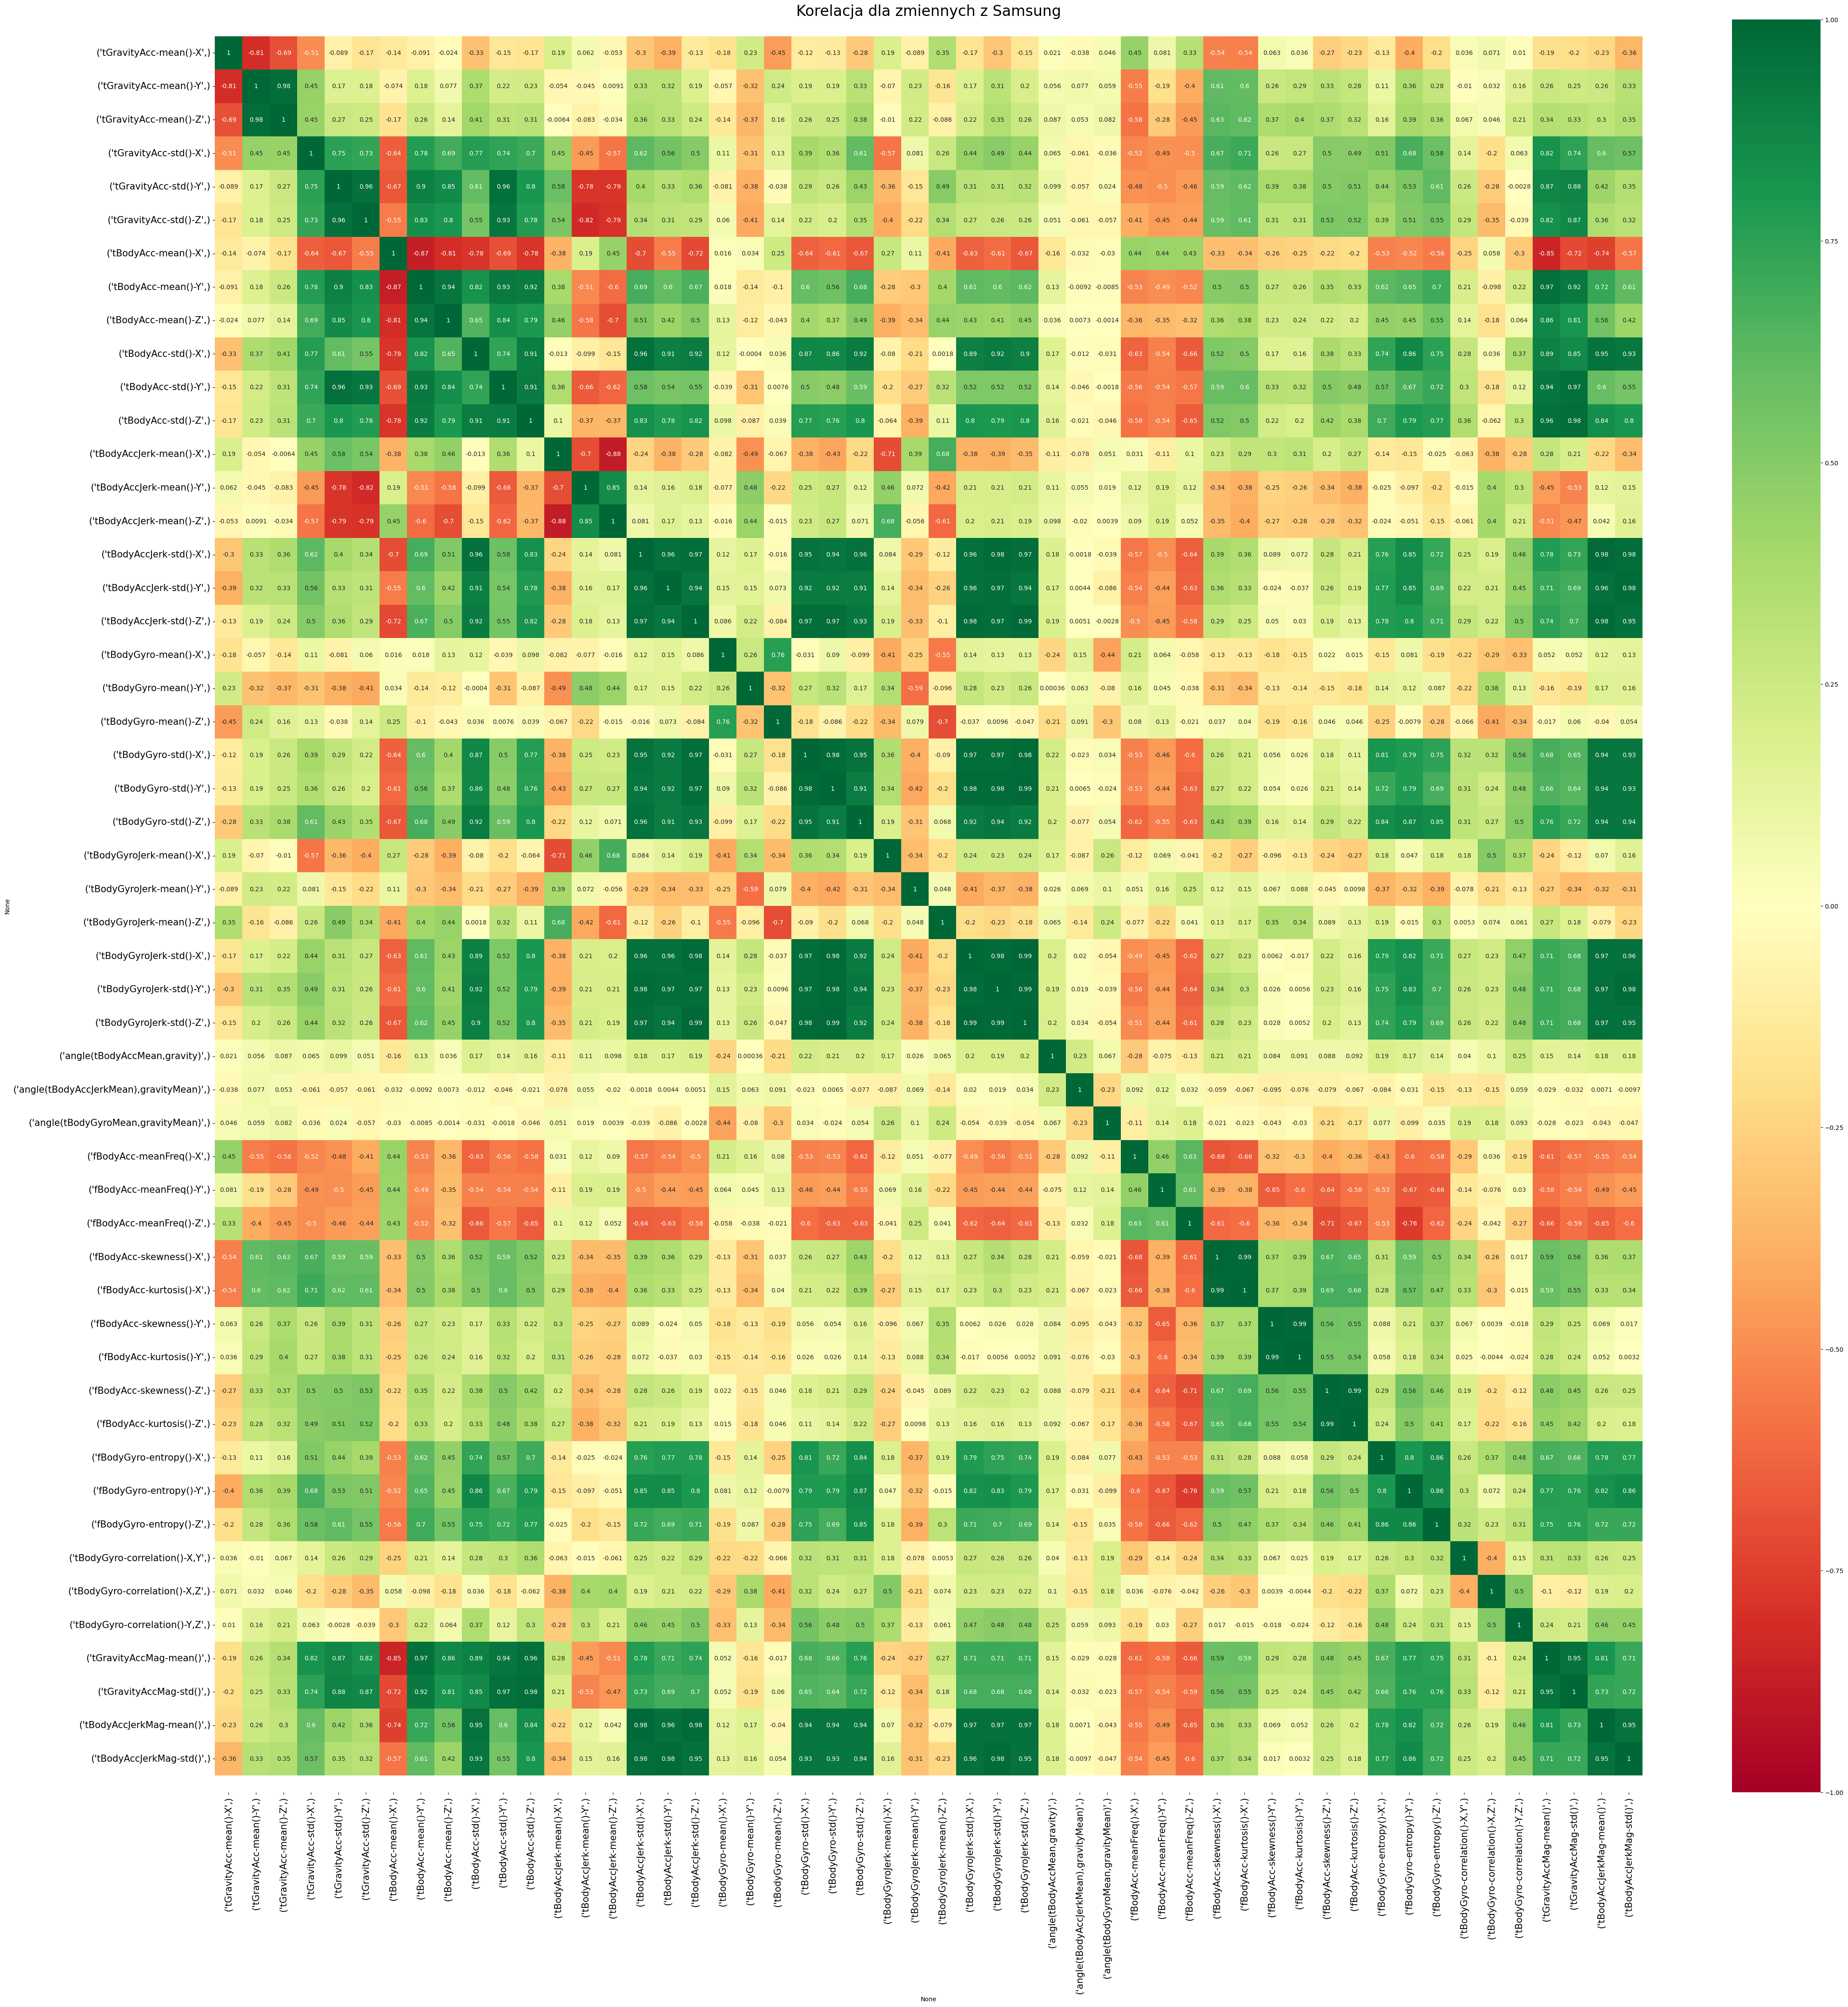

In [217]:
plt.figure(figsize=(52, 52))
ax = sns.heatmap(check.corr(),
                 xticklabels=check.corr().columns,
                 yticklabels=check.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z Samsung', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [246]:
main_features=[
    'tGravityAcc-mean()-X', 
    'tGravityAcc-mean()-Y', 
    'tGravityAcc-mean()-Z',
    
    'tBodyAcc-mean()-X',
    'tBodyAcc-mean()-Y',
    'tBodyAcc-mean()-Z',

    'tBodyAccJerk-mean()-X',

    'tBodyGyro-mean()-X', 
    'tBodyGyro-mean()-Y', 
    'tBodyGyro-mean()-Z',

    'tBodyGyroJerk-mean()-X',
    'tBodyGyroJerk-mean()-Y',
    'tBodyGyroJerk-mean()-Z',

    'angle(tBodyAccMean,gravity)',
    'angle(tBodyAccJerkMean),gravityMean)', 
    'angle(tBodyGyroMean,gravityMean)',
 
    'tBodyGyro-correlation()-X,Y',
    'tBodyGyro-correlation()-X,Z',
    'tBodyGyro-correlation()-Y,Z'
]
len(main_features)

19

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X[main_features], y, random_state=104, test_size=0.25, stratify=y)

In [248]:
X_train

,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAccJerk-mean()-X,tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z"
2909,0.927830,-0.125381,-0.251965,0.282773,-0.012263,-0.106524,0.087093,-0.021634,-0.172694,0.173796,-0.102344,-0.030807,-0.069730,-0.135414,-0.117635,-0.011425,-0.477532,0.554814,-0.951694
2849,-0.273035,0.744212,0.668543,0.300557,-0.015788,-0.114423,0.085507,-0.026524,-0.091011,0.084864,-0.095127,-0.039561,-0.055278,0.018648,0.009953,0.564630,-0.276120,-0.032672,-0.093324
442,0.937199,-0.256580,0.100119,0.301279,-0.008185,-0.168207,0.023555,0.156548,-0.043816,0.189980,-0.185000,0.080700,-0.035287,-0.050961,0.069491,-0.787849,-0.030136,0.143037,0.069221
1856,0.884103,-0.157066,-0.344963,0.290991,-0.066844,-0.118792,0.019584,0.141039,-0.140631,-0.173032,0.056678,-0.137278,-0.068087,-0.171855,0.106273,-0.850985,0.033983,-0.573962,0.267691
4427,0.895165,0.145970,0.295971,0.272026,-0.014210,-0.101271,0.079409,-0.026125,-0.089498,0.090099,-0.099841,-0.045178,-0.054049,0.046487,0.124217,-0.077666,-0.446637,0.282712,-0.867671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443,-0.396345,0.653252,0.775223,0.278297,-0.016851,-0.110206,0.070915,-0.029236,-0.071744,0.083305,-0.100712,-0.039730,-0.052375,0.376061,0.099323,0.084052,-0.441725,0.100049,-0.105048
81,0.952445,-0.259838,-0.026131,0.343370,-0.014446,-0.167377,0.336085,0.096082,-0.163394,0.025859,-0.054629,0.340289,-0.269672,-0.378574,-0.582073,-0.886349,0.104330,0.197395,0.091175
3330,-0.222886,0.569352,0.821168,0.295525,-0.045885,-0.077743,0.066440,-0.053921,-0.078958,0.095837,-0.090394,-0.036861,-0.066084,0.009567,0.358849,0.062142,-0.072235,-0.321749,-0.424363
1183,0.921413,0.155796,-0.005836,0.245560,0.007327,0.014569,0.074127,-0.548649,-0.489773,0.050081,-0.475771,-0.481885,0.063113,0.076880,0.061574,0.896845,0.576473,-0.227740,-0.043135


In [249]:
# tworzymy 19 algorytmów z k od 1 do 19
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X_train)
    for k in range(2, 20, 1) # zaczynamy od wartości n_clusters wynoszącej 2, gdyż nie ma sensu dzielenia zbioru dla 1 klastra
]

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklea

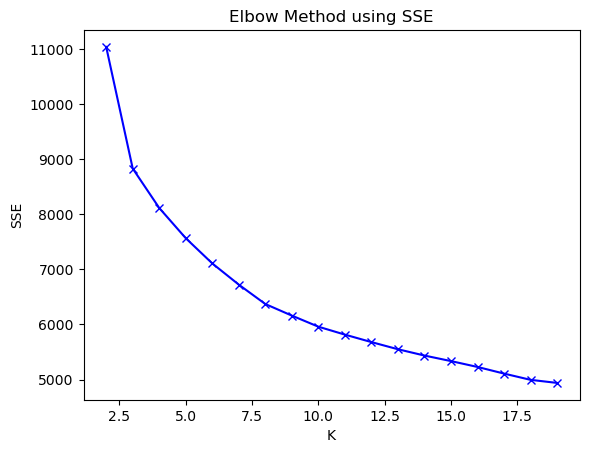

In [250]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20, 1), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

In [251]:
from sklearn.metrics import silhouette_score

silhouette_scores = [
    silhouette_score(X_train, model.labels_)
    for model in kmeans_per_k
]

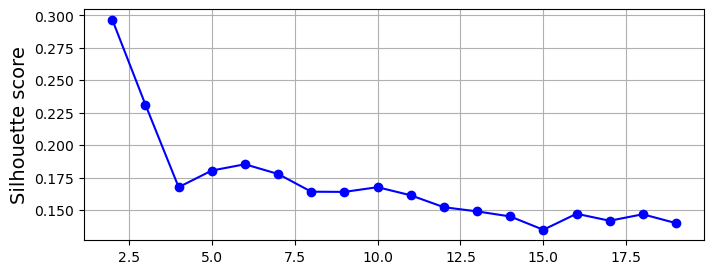

In [252]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20, 1), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

In [253]:
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)

print("Bez KMeans :", log_reg.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(
        n_clusters=4,
        random_state=2
    )),
    ("log_reg", LogisticRegression(
        multi_class="ovr",
        max_iter=5000,
        random_state=2
    ))
])
pipeline.fit(X_train, y_train)

print("Z KMeans :", pipeline.score(X_test, y_test))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anacon

Bez KMeans : 0.6500970873786408
Z KMeans : 0.6306796116504855


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [254]:
dbscan = DBSCAN(eps=0.75,min_samples=10)
dbscan.fit(X_train)
labels = dbscan.labels_

df = pd.DataFrame(labels)
print(df.value_counts())

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


 0    7437
-1     244
 1      33
 2      10
dtype: int64
Estimated no. of clusters: 4
Estimated no. of noise points: 244


In [255]:
from sklearn.metrics import silhouette_score as ss
ss(X_train, labels)

0.14339457062112448

In [256]:
dbscan_2 = DBSCAN(eps=0.75, min_samples=10)
dbscan_2.fit(X_train)
labels = dbscan_2.labels_

df = pd.DataFrame(labels)
print(df.value_counts())

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


 0    7437
-1     244
 1      33
 2      10
dtype: int64
Estimated no. of clusters: 4
Estimated no. of noise points: 244


In [257]:
from sklearn.metrics import silhouette_score as ss
ss(X_train, labels)

0.14339457062112448

In [258]:
def plot_dbscan(dbscan, X, size):
    X = X.to_numpy()
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

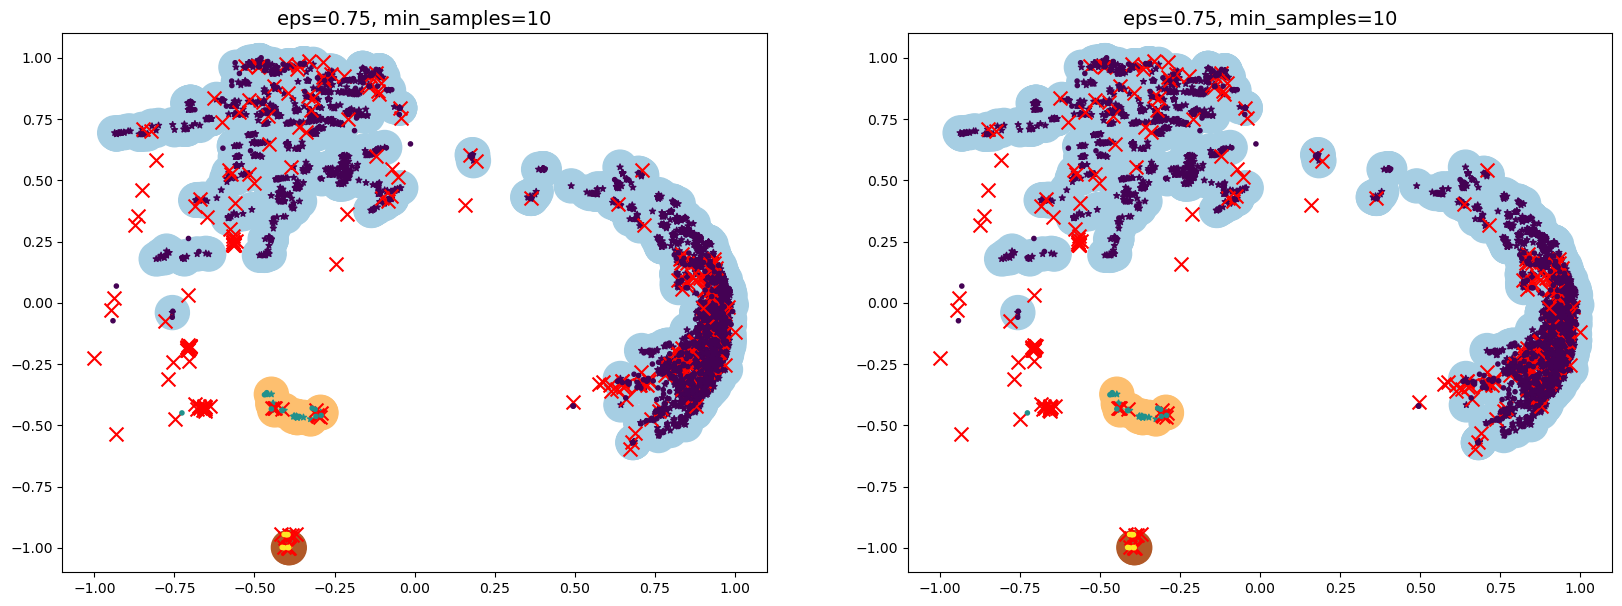

In [259]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plot_dbscan(dbscan, X_train, size=600)

plt.subplot(122)
plot_dbscan(dbscan_2, X_train, size=600)

plt.show()

In [260]:
gm = GaussianMixture(n_components=6, n_init=10, random_state=42)

In [261]:
gm.fit(X_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GaussianMixture(n_components=6, n_init=10, random_state=42)

In [262]:
gm.score(X_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


19.789335472799593

In [263]:
from matplotlib.colors import LogNorm

# metoda zaporzyczona z przykładów sklearn oraz lekko zmodyfikowana
def plot_gaussian_mixture(clf, X, resolution=1000):
    print(X.shape)
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
        
    mesh_list = ""
    mesh_variables = ""
    mesh_variables_ravel = ""

    for i in range(0, X_train.shape[1]):
        if i == 0:
            mesh_list += f'np.meshgrid(np.linspace(mins[0], maxs[0], resolution)'
            mesh_variables += f'xx{i}'
            mesh_variables_ravel += f'xx{i}.ravel()'
        elif i == X_train.shape[1] - 1:
            mesh_list += f', np.linspace(mins[{i}], maxs[{i}], resolution))'
        else:
            mesh_list += f', np.linspace(mins[{i}], maxs[{i}], resolution)'
            mesh_variables += f', xx{i}'
            mesh_variables_ravel += f', xx{i}.ravel()'
    print(exec(mesh_list).shape)
    exec("%s=%s" % (mesh_variables, mesh_list))
    
    #exec(mesh_variables) = np.meshgrid(exec(mesh_list))
    
    Z = -clf.score_samples(np.c_[exec(mesh_variables_ravel)])
    Z = Z.reshape(xx0.shape)

    plt.contourf(exec(mesh_variables), Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(exec(mesh_variables), Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')

    Z = clf.predict(np.c_[exec(mesh_variables_ravel)])
    Z = Z.reshape(xx0.shape)
    plt.contour(exec(mesh_variables), Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

In [265]:
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, X_train.columns)
])

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('kmeans', KMeans(n_clusters=6, random_state=2)),
                                 ('model', LogisticRegression(max_iter=5000, solver='saga'))])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.90, 0.95],
    'model__C': np.logspace(-4, 4, 50),
    'model__penalty': ['elasticnet'],
    'model__l1_ratio': [0, 0.5, 1]
}

grid_search = GridSearchCV(model_pipeline, params, cv=3, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_pipeline_v2 = grid_search.best_estimator_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wybrane hiperparametry:  {'model__C': 75.43120063354607, 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'preprocessor__numeric_preprocessing__pca__n_components': 0.95}


In [266]:
pipeline = Pipeline([
    ("kmeans", KMeans(
        n_clusters=6,
        random_state=2
    )),
    ("model", RandomForestClassifier(n_estimators=1000, n_jobs=-1))
])

params_rf = {'model__max_depth': [3, 5, 10, 20],
             'model__min_samples_leaf': [3, 5, 10, 15]}

rf_gridsearch = GridSearchCV(pipeline,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)



Best hyperparameter: {'model__max_depth': 20, 'model__min_samples_leaf': 3}


In [267]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [268]:
pipeline = Pipeline([
    ("kmeans", KMeans(
        n_clusters=6,
        random_state=2
    )),
    ("model", AdaBoostClassifier())
])

params_rf = {'model__n_estimators': range(10,60,10),
            'model__learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1]}
rf_gridsearch = GridSearchCV(pipeline,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
ab_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best hyperparameter: {'model__learning_rate': 0.1, 'model__n_estimators': 50}


In [269]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC - One Vs Rest', 'AUC - One vs One'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    #Checking the F1_score/AUC and summarizing 
    global metrics_dataframe
    
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    f1_metric = f1_score(y_checked, predictions, average='weighted')
    auc_metric_ovr = roc_auc_score(y_checked, predictions_proba, multi_class='ovr')
    auc_metric_ovo = roc_auc_score(y_checked, predictions_proba, multi_class='ovo')
    
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC - One Vs Rest': auc_metric_ovr, 'AUC - One vs One': auc_metric_ovo},
                                                 ignore_index=True)

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))
    
    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    
    return metrics_dataframe

In [270]:
def multi_roc(model, X_test, y_train, y_test, name):
    
    
    y_score = model.predict_proba(X_test)

    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
     
    #provide names of target classes
    target_names = y_train.drop_duplicates()
    target_names = target_names.values

    #provide number of target classes
    n_classes = target_names.size
    
    from sklearn.preprocessing import LabelBinarizer

    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  # (n_samples, n_classes)
    
    from sklearn.metrics import RocCurveDisplay
    from sklearn.metrics import roc_curve, auc

    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

    from itertools import cycle

    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            color=color,
            ax=ax,
        )
        
    plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
    plt.legend()
    plt.show()
    

    

Micro-averaged One-vs-Rest ROC AUC score:
0.93
Macro-averaged One-vs-Rest ROC AUC score:
0.91


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


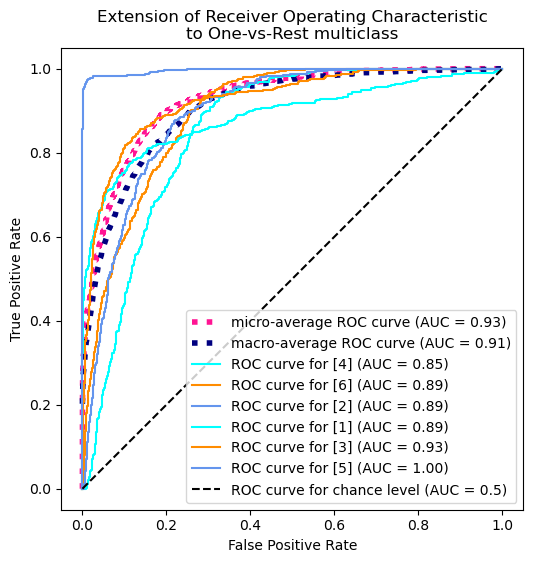

In [271]:
multi_roc(model=model_pipeline_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='Logistic Regression')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Micro-averaged One-vs-Rest ROC AUC score:
0.95
Macro-averaged One-vs-Rest ROC AUC score:
0.94


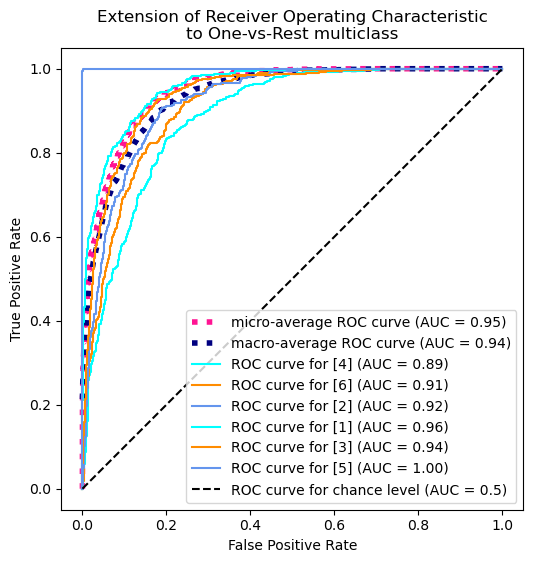

In [272]:
multi_roc(model=rf_model_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='Random Forrest')

Micro-averaged One-vs-Rest ROC AUC score:
0.85
Macro-averaged One-vs-Rest ROC AUC score:
0.85


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


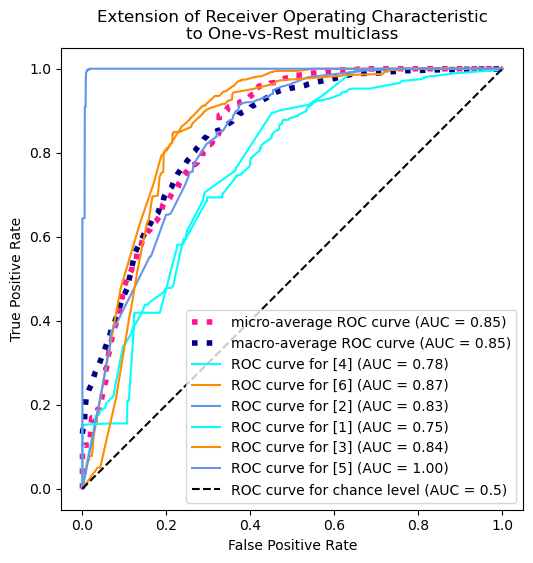

In [273]:
multi_roc(model=ab_model_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='Ada Boost')